In [50]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

# This method applies noise to measurement and gates with prob. p_meas and p_gate, resectively 
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

In [71]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram


def create_encoding_circuit(qc):
    # Encoding |0> into |000>
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.barrier()

def introduce_error(qc, qubit_index):
    qc.x(qubit_index)
    qc.barrier()

def syndrome_measurement(qc):
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(1, 4)
    qc.cx(2, 4)
    qc.barrier()
    qc.measure([3,4],[3,4])
    qc.barrier()

def error_correction(qc):
    qc.ccx(3, 4, 1)
    qc.x(4)
    qc.ccx(3, 4, 0)
    qc.x(3)
    qc.ccx(3, 4, 2)
    qc.barrier()
    qc.measure([0,1,2],[0,1,2])

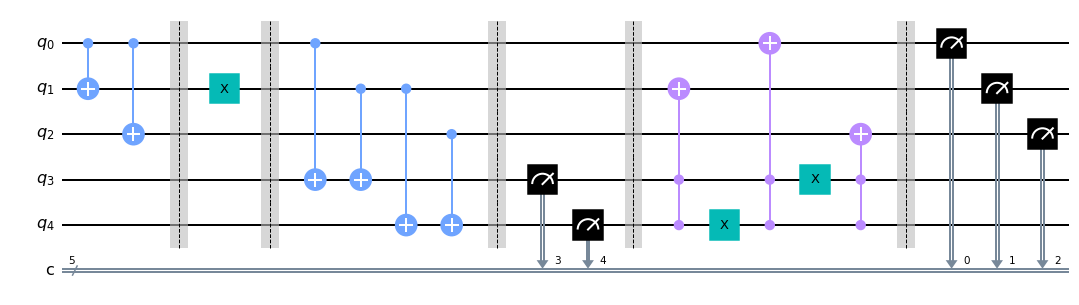

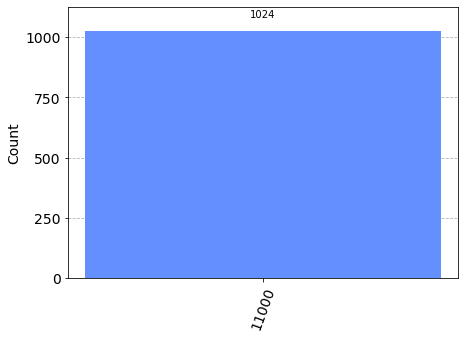

In [72]:
qc = QuantumCircuit(5,5)

create_encoding_circuit(qc)

# Introduce a bit-flip error on a random qubit; the second qubit
introduce_error(qc, 1)

# Add syndrome measurement to detect and correct the error
syndrome_measurement(qc)

error_correction(qc)

display(qc.draw(output='mpl', fold=-1))

qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()

plot_histogram(counts)


## Without Noise

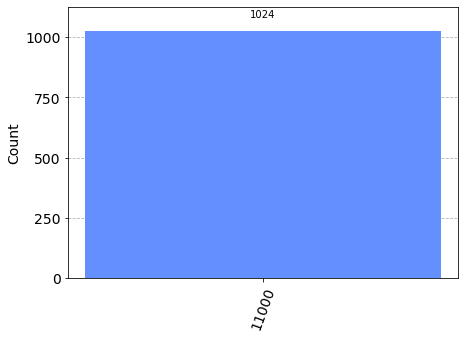

In [73]:
noise_model = get_noise(0,0)

qobj = assemble(qc)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)


## With Noise

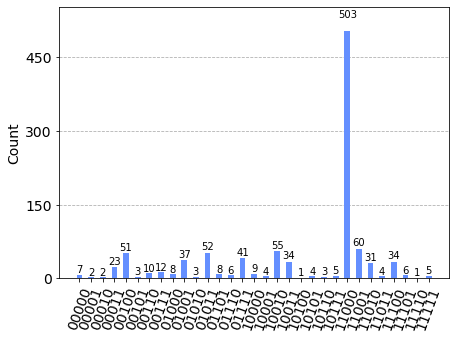

In [77]:

noise_model = get_noise(0,0.1)

qobj = assemble(qc)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)
